In [ ]:
# Checking the list of installed modules
pip list

In [ ]:
# Installing Tensor Flow
!pip install --upgrade tensorflow
!pip install scikit-learn
!pip install yfinance

In [32]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override() # <== that's all it takes :-)

In [33]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [34]:
# Defining the Time Frame
start = dt.datetime(2022,1,1)
end = dt.datetime(2023,1,1)

In [35]:
# Loading the Training stock data
ticker = 'GOOG'
data = yf.download(ticker, start, end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [36]:
# Preparing the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data                               

array([[0.95411052],
       [0.94391648],
       [0.8391393 ],
       [0.83755116],
       [0.8290845 ],
       [0.85340036],
       [0.87576403],
       [0.90102478],
       [0.86202967],
       [0.87218517],
       [0.81802264],
       [0.80813048],
       [0.77489099],
       [0.72199107],
       [0.72632901],
       [0.66998982],
       [0.70879144],
       [0.70694776],
       [0.77152915],
       [0.80885103],
       [0.84262501],
       [1.        ],
       [0.91655626],
       [0.92221898],
       [0.85903968],
       [0.86330008],
       [0.89800383],
       [0.85384172],
       [0.78455077],
       [0.80267721],
       [0.8201143 ],
       [0.8365675 ],
       [0.75633076],
       [0.72780864],
       [0.71130886],
       [0.68315091],
       [0.76198545],
       [0.79058511],
       [0.79634074],
       [0.7851394 ],
       [0.79417934],
       [0.78730837],
       [0.75344124],
       [0.66579136],
       [0.67840247],
       [0.78046058],
       [0.76211736],
       [0.727

In [37]:
prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])

#Reshaping the training data
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.95411052],
        [0.94391648],
        [0.8391393 ],
        ...,
        [0.89906503],
        [0.90570361],
        [0.92584418]],

       [[0.94391648],
        [0.8391393 ],
        [0.83755116],
        ...,
        [0.90570361],
        [0.92584418],
        [0.91646335]],

       [[0.8391393 ],
        [0.83755116],
        [0.8290845 ],
        ...,
        [0.92584418],
        [0.91646335],
        [0.87006277]],

       ...,

       [[0.24493977],
        [0.2931221 ],
        [0.29017845],
        ...,
        [0.07390028],
        [0.0979139 ],
        [0.06878765]],

       [[0.2931221 ],
        [0.29017845],
        [0.29048825],
        ...,
        [0.0979139 ],
        [0.06878765],
        [0.04601336]],

       [[0.29017845],
        [0.29048825],
        [0.24912275],
        ...,
        [0.06878765],
        [0.04601336],
        [0.08459016]]])

In [52]:
# Building the Neural Network
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1)) # Prediction of the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 6s 57ms/step - loss: 0.0740
Epoch 2/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0238
Epoch 3/25
6/6 [==============================] - 0s 53ms/step - loss: 0.0217
Epoch 4/25
6/6 [==============================] - 0s 58ms/step - loss: 0.0113
Epoch 5/25
6/6 [==============================] - 0s 56ms/step - loss: 0.0113
Epoch 6/25
6/6 [==============================] - 0s 53ms/step - loss: 0.0109
Epoch 7/25
6/6 [==============================] - 0s 55ms/step - loss: 0.0092
Epoch 8/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0086
Epoch 9/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0082
Epoch 10/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0088
Epoch 11/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0078
Epoch 12/25
6/6 [==============================] - 0s 54ms/step - loss: 0.0081
Epoch 13/25
6/6 [==============================] - 0s 53ms/st

In [53]:
## Testing the Model Accuracy on Existing Data

In [54]:
# Loading the Test Data
test_start = dt.datetime(2023,1,1)
test_end = dt.datetime.now()

In [55]:
# Loading the Training stock data
ticker = 'GOOG'
test_data = yf.download(ticker, test_start, test_end)
test_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...
2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000
2023-12-20,140.330002,143.078003,139.410004,139.660004,139.660004,33507300
2023-12-21,140.770004,142.029999,140.473007,141.800003,141.800003,18101500


In [56]:
# Specifying Test Data
actual_prices = test_data['Close'].values
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1) # reshaping to look like the test data

#Transforming the Test Data
model_inputs = scaler.transform(model_inputs)


In [57]:
# Making the Stock Price Prediction
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Using the model to make actual prediction
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 1s 20ms/step


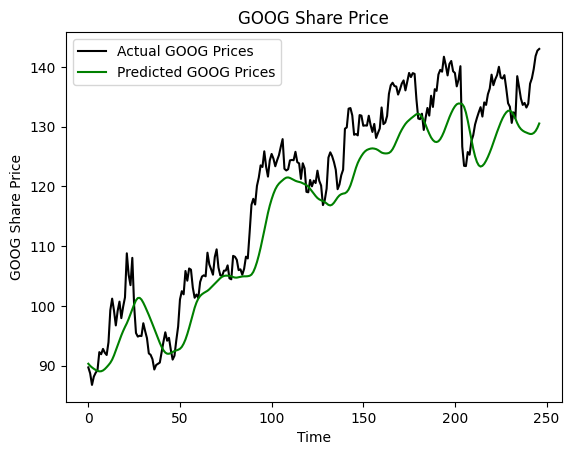

In [58]:
# Plotting the Test Predictions
plt.plot(actual_prices, color="black", label=f"Actual {ticker} Prices")
plt.plot(predicted_prices, color="green", label=f"Predicted {ticker} Prices")
plt.title(f"{ticker} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{ticker} Share Price")
plt.legend()
plt.show()


In [60]:
# Predicting Next day Stock prices
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

1/1 [==============================] - 1s 1s/step
Prediction: [[131.39232]]
